# Quelques définitions

## Machine Learning: Regression Linéaire

Le Machine Learning (ML) est essentiellement ce domaine de l'informatique, à l'aide duquel des systèmes informatiques peuvent donner un sens aux données de la même manière que l'être humain. En termes simples, ML est un type d'intelligence artificielle qui extrait des modèles de données brutes en utilisant un algorithme ou une méthode. Le principal objectif de ML est de permettre aux systèmes informatiques de tirer des enseignements de leurs expériences sans être explicitement programmés. On distingue deux types de problèmes en machine learning: le Supervised Learning (Apprentissage supervisé) et le Unsupervised learning (Apprentissage non supervisé). 

## Supervised Learning (Apprentissage supervisé)

Dans cet type de machine learning, il s'agit de fournir aux algorithmes des données d'entrainement qui contiennent deux types de variable (X,y). Ou X représentent les variables predictives (variables indépendantes) et la variable y qui est la variable à prédire. La variable y peut être discrête (prend un nombre fini de valeurs) ou continue (peut prendre n'importe qu'elle valeur d'un intervalle). Si la variable est discrète, on est dans le cas des algorithmes de classification, si la variable est continue, on est dans le cas de la régression. Dans ce tuto, nous allons traiter le cas de la régression linéaire. Un algorithme de régression permet de trouver un modèle en fonction  des données d’entrainement. Le modèle obtenu permettra de donner une estimation sur une nouvelle donnée non encore vue par l’algorithme.

## Unsupervised Learning (Apprentissage non-supervisé)

L'apprentissage non supervisé est l'apprentissage d'un algorithme qui utilise des informations qui ne sont pas étiquetées et permettant à l'algorithme d'agir sur ces informations sans aide. Dans ce type d'apprentissage, un algoithme peut regrouper des informations non triées en fonction de similitudes et de différences, même si aucune catégorie n'est fournie.

### Dans cette première partie du tutoriel nous importons d'abord les modules qu'on a besoin pour notre projet.

In [1]:
import  pandas as pd #Module python qui nous permet de travailler avec les dataframes
from sklearn.preprocessing import StandardScaler  #Module qui nous permet de normaliser les variables de notre dataframe
from sklearn.preprocessing import Imputer #Module qui permet de remplacer les données manquantes
import numpy as np # Module qui permet de travailler avec des valeurs numériques 
from sklearn.linear_model import LinearRegression # La regression linéaire
from sklearn.model_selection import train_test_split # module pour diviser les données en training set et testing set
import seaborn as sns #Module qui permet de faire la visualisation
import matplotlib.pyplot as plt ##Module qui permet de faire la visualisation

## Lien pour la récupération des données

In [2]:
url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data"

## DataFrame

Ici nous utilisons le module pandas pour la création de notre DataFrame. Un dataframe est un élément qui a des variables (colonnes) et des observations (lignes), c'est comme une table dans une base de données SQL. Ou encore comme un fichier excel.

In [3]:
data = pd.read_csv(url, header = None) #read_csv permet de charger les fichiers csv

La méthode head() nous permet de vérifier les cinq premières lignes de notre dataframe. Elle permet aussi de vérifier si les données sont correctement chargées. Comme nous le remarquons ici, notre jeu de données n'a pas d'entêtes. C'est pourquoi on met "header = None"

In [4]:
data.head() # Affichage des 5 première lines du dataframe

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
data.tail() #affichage les 5 dernières lines du dataframe

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


La vérications des premières lignes (ou dernières) nous permet d'avoir quelques informations. Par exemple ici, nous voyons que notre jeu de données ne contient pas de noms de variables. Elle permet aussi de voir si notre jeu de données est correctement importé.

### Modification des entêtes:

Verifiez le lien "http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.names" pour plus d'infos sur les noms des variables.
Notre dataframe contient 26 colonnes (de 0 à 25). Nous allons définir une liste nommé col_name de 26 éléments qui vont les entétes du dataframe.

In [6]:
col_name = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels\n", 
           "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system\n",
           "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [7]:
len(col_name) #La fonction len() permet de vérifier la longueur d'une liste

26

In [8]:
data.columns = col_name # Ici nous renommons les colonnes de notre dataframe

In [9]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## info()

La méthode info() est utiliser pour avoir des informations sur notre dataframe tels: nombre de colonnes, types des variables, etc.

In [10]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels
        205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system
         205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

La méthode dtypes nous permet de vérifier aussi le types des variables.

In [11]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels\n        object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system\n         object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Ici nous voyons que le type de la variable price est object. On sait bien que le prix d'un voiture doit être un entier ou un réel. Ceci mérite donc des corrections. Nous allons utiliser la méthode to_numeric() du module pandas pour convertir ce type en un réel (float).

In [12]:
data["price"] = pd.to_numeric(data["price"], errors = "coerce") #errors = coerce permet les valeurs qu'il peut pas convertier à NaN

In [13]:
data["price"].dtype

dtype('float64')

La méthode describe() nous permet de savoir les données staistique d'un dataframe telles qu: mean, mediane, max, etc. 

In [14]:
data["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

La methode describle nous permet aussi de savoir s'il y'a des valeurs manquantes. Parce qu'elle ne conmpte que des observations qui contiennent des valeurs. Ici nous voyons bien que la price contient 4 valeurs manquantes. Parce que notre dataframe contient 225 observations alors que pour la colonne price on a count=221

In [15]:
mean = data["price"].mean()

In [16]:
data["price"] = data["price"].replace(np.nan, mean)

In [17]:
data["price"].describe()

count      205.000000
mean     13207.129353
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [18]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels\n        object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system\n         object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [19]:
from scipy import stats  # Module pour faire des calculs statistiaques

# Pearson_correlation

Pour cette méthode, on récupére deux valeurs: le coefficient de correlation et la p_value. Si le coefficient est proche de 1 (ou -1) et que la p_value est inférieur à 0.001, alors nous avons une forte corrélation avec une certitude éleveé. 

In [20]:
coef, p_val = stats.pearsonr(data["price"], data["engine-size"]) # 

In [21]:
coef, p_val

(0.8617522436859721, 9.669661923634464e-62)

Nous voyons que les deux variables price et engine-size ont une forte corrélation car coef = 0.8617522436859721 et p_val = 9.669661923634464e-62<0.001. Vérifions cette corrélation de manière graphique.

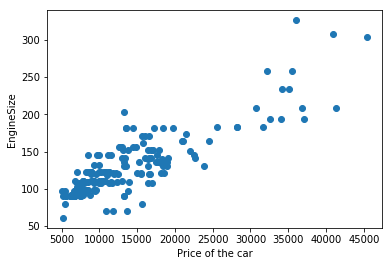

In [22]:
plt.scatter(data["price"], data["engine-size"]) #scatter() est un methode qui nous permet de voir la relation qui existe entre deux variables
plt.xlabel("Price of the car")
plt.ylabel("EngineSize")
plt.show()

In [23]:
%matplotlib inline

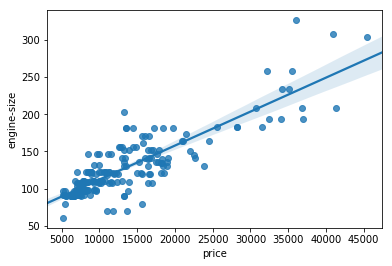

In [24]:
sns.regplot(x = "price", y = "engine-size", data = data)
plt.show()

In [25]:
data["engine-size"].describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

### Régression linéaire simple

Pour la prémière partie de ce tuto on utilise la régression linéaire simple. Ici, nous utilisons deux variables: la variable dépendante X et la variable à prédire y.

In [26]:
linear_model = LinearRegression() # 

In [27]:
X = data[["engine-size"]]
y = data["price"]

In [28]:
linear_model.fit(X,y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_pred = linear_model.predict(X.head())

In [30]:
y_pred

array([13710.72939852, 13710.72939852, 17293.12088782, 10291.173886  ,
       14687.74525924])

In [31]:
linear_model.coef_

array([162.83597679])

In [32]:
linear_model.intercept_

-7457.947583746252

In [33]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [34]:
linear_model.score(X.head(), y_pred)

1.0

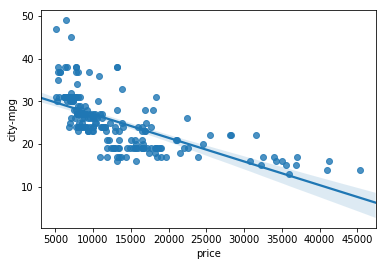

In [35]:
sns.regplot(x = "price", y = "city-mpg", data = data) # Ces deux variables sont négativement corrélées
plt.show()

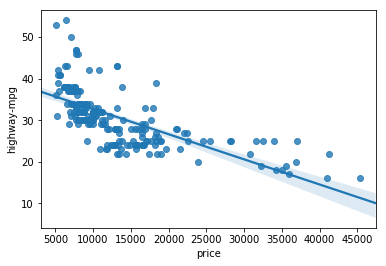

In [36]:
sns.regplot(x = "price", y = "highway-mpg", data = data)
plt.show()

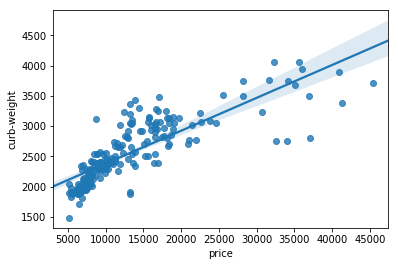

In [37]:
sns.regplot(x = "price", y = "curb-weight", data = data) #Corrélation des variables price et curb-weighyt
plt.show()

# Regression linéaire multiple

Pour la régression linéaire mutiple, on utilise plusieurs variables dépendantes pour essayer de prédire une seule variable indépendante.

In [38]:
XX = data[["curb-weight", "highway-mpg", "city-mpg", "engine-size"]]

In [39]:
mul_linear_model = LinearRegression()

## Model évalution

In [40]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.25, random_state = 111)

In [41]:
mul_linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
y_pred = mul_linear_model.predict(X_test)

In [43]:
print("preddiction: {}".format(y_pred))

preddiction: [24510.02857284 21516.31146893  9877.13003475 21279.18909882
 15188.46678968 10166.15928227 14870.69973052  7179.72716918
  5850.53729959 31875.90240125  5567.87843683  9775.30766563
 35659.39882784 16666.147641   19087.05535387 12655.66506746
 13368.70918838 43178.16176704  9582.5197973  11486.71794038
 11253.68821714 11216.93410356  7810.14078536 15927.20014243
  5718.79261623 14762.52472436 10863.26141939 21706.4347228
 16792.88001651 14870.69973052 15778.10616944  5850.53729959
 12815.54144003  6868.92901634  9731.48408934 41289.17727555
  5813.85424317 11376.81047613 17971.73078085  6511.03845149
  5872.14221481 13465.87527536  6598.66277889 17060.11378012
  4736.44131993 23026.72657044  5813.85424317 25816.98214081
 15205.75072185 11589.55291791 15511.70353586 21354.37649717]


In [44]:
mul_linear_model.score(X_test, y_test)

0.7563902011226922

Lasso: cet algorithme nous permet de selectionner les variables les plus significatives de notre model. Il réduit les coeffiecients les moins importants a 0.

In [45]:
from sklearn.linear_model import Lasso #Lasso nous permet de sélections les variables les plus significatives

In [49]:
lasso2 = Lasso(alpha=2, normalize = True)

In [50]:
lasso2.fit(X_train, y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [51]:
lasso2.score(X_test, y_test)

0.7658141697099647

Dans ce qui suit partie nous essayons de voire quelles sont les variables les plus significatives.

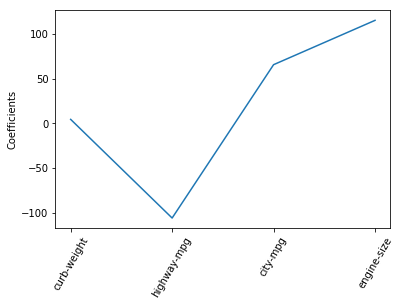

In [52]:
names = ["curb-weight", "highway-mpg", "city-mpg", "engine-size"]
lasso_coef = lasso2.coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

### Nous voyons que "city-mpg", "highway-mpg" et "engine-size" sont les  variables les plus significatives de notre model.

#### Si vous voulez avoir quelques élèments de base sur pandas cliquer sur ce lien https://github.com/seyepapa/Tutoriel_Pandas

#### Si vous voulez avoir quelques élèments de base sur la classification cliquer sur https://github.com/seyepapa/Tuto-Machine-Learning-supervised-learning